# Data Science Intern at (The Sparks Fundation)
# Task 1 Create a Decision tree Classifier and visualize it graphically

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import random

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop('Id',inplace=True, axis=1)

In [5]:
x_data=df.iloc[:,:-1]

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
x=df.iloc[:,:-1] # features
y=df.iloc[:,-1] # target

# train_test_splitting

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Define the Decision Tree

In [9]:
dtc=DecisionTreeClassifier(max_depth=4,max_features='log2')

# Train a Model

In [11]:
dtc.fit(x_train,y_train) # ( we can reduce max_width if our model exists on overfitting case )

DecisionTreeClassifier(max_depth=4, max_features='log2')

# Test a model with Testing Data

In [12]:
y_pred=dtc.predict(x_test)

# Check Accuracy

In [13]:
accuracy_score(y_test,y_pred) 

0.9333333333333333

# Cross_val_score

In [14]:
cross=cross_val_score(dtc,x_train,y_train,cv=5,scoring='accuracy')
print("cross_val",cross)

cross_val [0.875      0.95833333 1.         0.875      0.95833333]


# corss_val_predected

In [15]:
predicted = cross_val_predict(dtc, x_train, y_train, cv=5)
print('corss_val_predected',predicted)

corss_val_predected ['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica

# Decision Tree

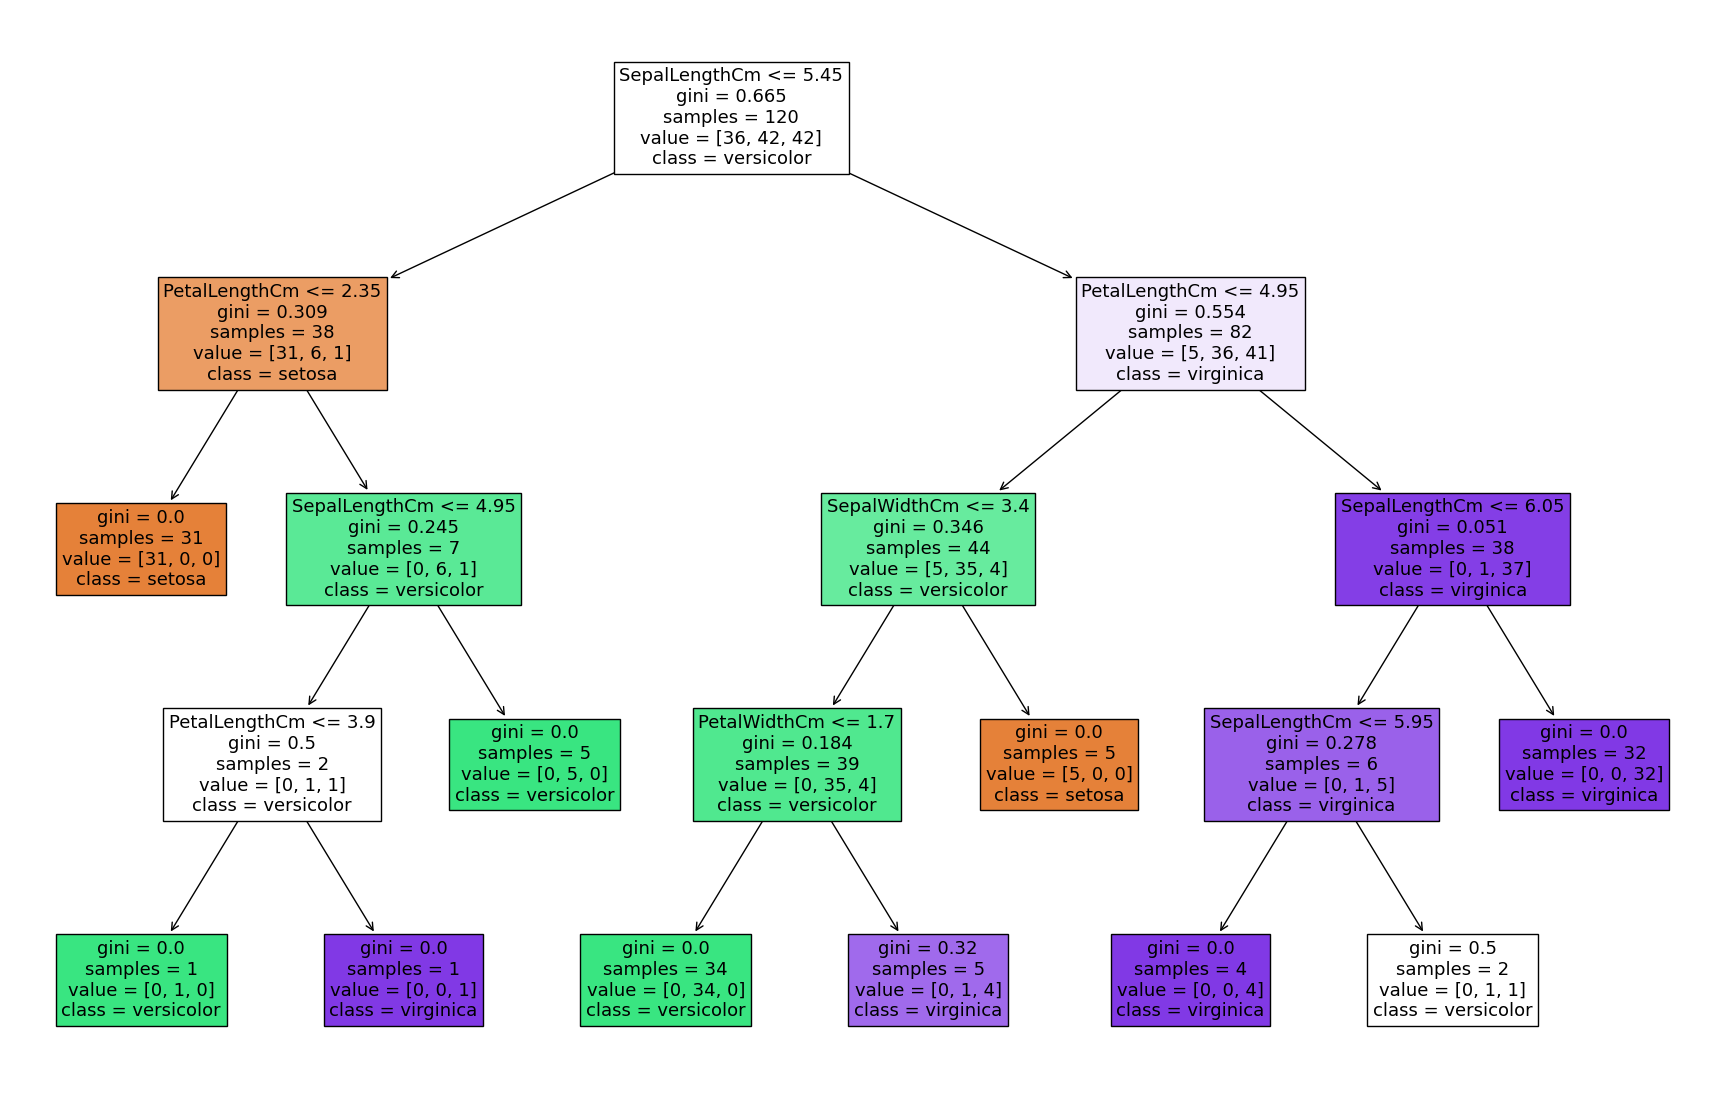

In [16]:
plt.figure(figsize=(22, 14))
plot_tree(dtc,feature_names=x_data.columns,fontsize=13
          ,filled=True,impurity=True,class_names=["setosa", "versicolor", "virginica"])
plt.show()

#  Here I will Generate the random row and Check it out it will predict right class accordingly to Decision Tree or not ?

In [29]:
# First

ran=random.randint(0,150)
print(x_data.iloc[[ran]])

y_pred1=dtc.predict(x_data.iloc[[ran]])
print('y_pred1 (predictio1) ',y_pred1)

# Second

y_pred2=dtc.predict([[4.3,3.4,7.4,9.2]])
print('y_pred2 (prediction2)',y_pred2) # (According to Decision Tree classifier)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
58            6.6           2.9            4.6           1.3
y_pred1 (predictio1)  ['Iris-versicolor']
y_pred2 (prediction2) ['Iris-virginica']


C:\python37\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# I would like to represent Graphically for check it how actually look after 4 decision Boundaries for classification problem (if max_depth=4)

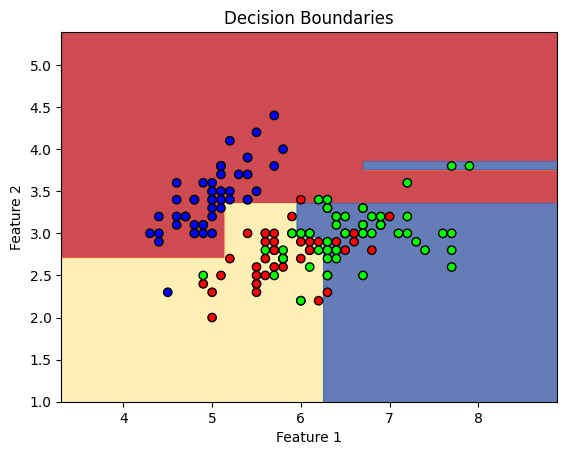

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Consider only the first two features for visualization
y = iris.target

# Train a Decision Tree Classifier
clf=DecisionTreeClassifier(max_depth=4,max_features='log2')
clf.fit(X, y)

# Create a mesh grid that covers the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Use the mesh grid to make predictions
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Set np.nan for non-finite values in Z
Z = np.where(np.isfinite(Z), Z, np.nan)

# Create a masked array to handle np.nan values for plotting
Z_masked = np.ma.masked_where(np.isnan(Z), Z)

# Create a contour plot to visualize decision boundaries
plt.contourf(xx, yy, Z_masked, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()
